In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [211]:
df = pd.read_fwf('annual_csv.txt')
df.head(3)

,"Source,Year,Mean"
0,"GCAG,2016,0.9363"
1,"GISTEMP,2016,0.99"
2,"GCAG,2015,0.8998"


# Cleaning and formating data: dataframe

In [212]:
df[['Source', 'Year', 'Mean']] = df['Source,Year,Mean'].str.split(',', expand=True)
df.drop(columns=['Source,Year,Mean'], inplace=True)
df.tail(3)

,Source,Year,Mean
271,GISTEMP,1881,-0.12
272,GCAG,1880,-0.1148
273,GISTEMP,1880,-0.2


In [213]:
dataframe1 = df.iloc[::-1]
dataframe1.reset_index(drop=True, inplace=True)


In [214]:
dataframe1['Year'] = dataframe1['Year'].astype(int)

dataframe1['Mean'] = pd.to_numeric(dataframe1['Mean'], errors='coerce')

dataframe1['Decade'] = (dataframe1['Year'] // 10) * 10

dataframe1.dropna(subset=['Mean'], inplace=True)

dataframe = dataframe1[dataframe1['Source'] == 'GISTEMP']
dataframe


,Source,Year,Mean,Decade
0,GISTEMP,1880,-0.20,1880
2,GISTEMP,1881,-0.12,1880
4,GISTEMP,1882,-0.10,1880
6,GISTEMP,1883,-0.21,1880
8,GISTEMP,1884,-0.28,1880
...,...,...,...,...
264,GISTEMP,2012,0.63,2010
266,GISTEMP,2013,0.65,2010
268,GISTEMP,2014,0.74,2010
270,GISTEMP,2015,0.87,2010


# Analisi de tendencia

Un análisis de tendencia implica examinar los datos a lo largo del tiempo para identificar patrones de aumento, disminución o estabilidad en una serie temporal. En tu caso, estás interesado en analizar la tendencia de las temperaturas globales a lo largo de los años.

## Largo plazo: Polinomical

ARIMA es especialmente útil cuando trabajas con datos establecidos y deseas entender patrones y tendencias en esos datos. Si tienes datos históricos y deseas analizar cómo han cambiado con el tiempo, ARIMA puede ayudarte a identificar relaciones entre los puntos de datos pasados y hacer proyecciones razonables sobre cómo podrían evolucionar en el futuro.

Es importante tener en cuenta que ARIMA es más efectivo en situaciones donde hay cierta regularidad o patrón en los datos. Si tus datos son muy caóticos o cambian drásticamente sin una estructura discernible, ARIMA podría tener dificultades para proporcionar resultados significativos.

### By decade

C:\Users\Fiona A\AppData\Local\Temp\ipykernel_10548\2362851128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(subset=['Mean'], inplace=True)


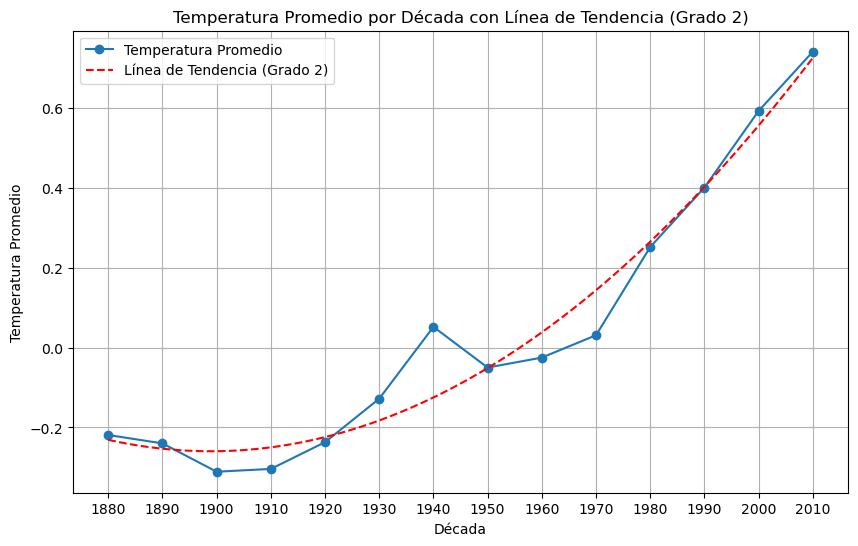

In [215]:
dataframe.dropna(subset=['Mean'], inplace=True)

decade_grouped = dataframe.groupby('Decade')['Mean'].mean().reset_index()

trend_line = np.polyfit(decade_grouped['Decade'], decade_grouped['Mean'], 2)
trend_function = np.poly1d(trend_line)

trend_x = np.linspace(min(decade_grouped['Decade']), max(decade_grouped['Decade']), 100)


plt.figure(figsize=(10, 6))
plt.plot(decade_grouped['Decade'], decade_grouped['Mean'], marker='o', label='Temperatura Promedio')
plt.plot(trend_x, trend_function(trend_x), '--', color='red', label='Línea de Tendencia (Grado 2)')
plt.xlabel('Década')
plt.ylabel('Temperatura Promedio')
plt.title('Temperatura Promedio por Década con Línea de Tendencia (Grado 2)')
plt.xticks(decade_grouped['Decade'])
plt.legend()
plt.grid(True)
plt.show()

### Analisis

In [216]:
import pandas as pd
import numpy as np

# Supongamos que tienes el DataFrame df con los datos

# Calcular las tasas de cambio por década
dataframe['Tasa_de_Cambio'] = dataframe['Mean'].diff() / 10  # Dividido por 10 para obtener la tasa por década

# Calcular la tasa de cambio promedio por década para diferentes períodos
tasas_promedio_1880s = dataframe[dataframe['Decade'] == 1880]['Tasa_de_Cambio'].mean()
tasas_promedio_2010s = dataframe[dataframe['Decade'] == 2010]['Tasa_de_Cambio'].mean()

# Comparar las tasas de cambio promedio
print("Tasa de cambio promedio en la década de 1880:", tasas_promedio_1880s)
print("Tasa de cambio promedio en la década de 2010:", tasas_promedio_2010s)



# Calcular el aumento promedio por década
aumentos_por_decada = dataframe.groupby('Decade')['Mean'].mean().diff()

# Imprimir los resultados
aumentos_por_decada

Tasa de cambio promedio en la década de 1880: 0.0008888888888888889
Tasa de cambio promedio en la década de 2010: 0.005


C:\Users\Fiona A\AppData\Local\Temp\ipykernel_10548\447965118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Tasa_de_Cambio'] = dataframe['Mean'].diff() / 10  # Dividido por 10 para obtener la tasa por década


Decade
1880         NaN
1890   -0.021000
1900   -0.071000
1910    0.007000
1920    0.067000
1930    0.109000
1940    0.180000
1950   -0.102000
1960    0.025000
1970    0.056000
1980    0.221000
1990    0.149000
2000    0.192000
2010    0.148429
Name: Mean, dtype: float64

### By year

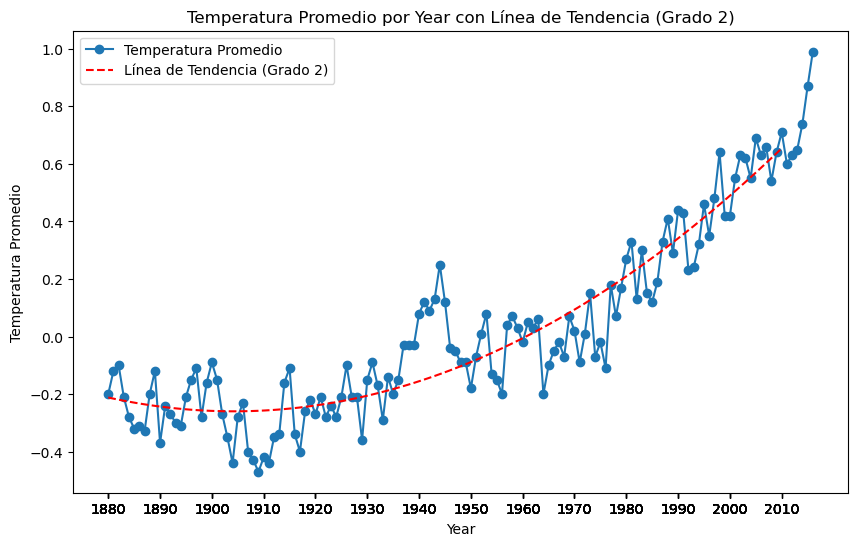

In [217]:
trend_line = np.polyfit(dataframe['Year'], dataframe['Mean'], 2)
trend_function = np.poly1d(trend_line)

trend_x = np.linspace(min(dataframe['Decade']), max(dataframe['Decade']), 100)

plt.figure(figsize=(10, 6))
plt.plot(dataframe['Year'], dataframe['Mean'], marker='o', label='Temperatura Promedio')
plt.plot(trend_x, trend_function(trend_x), '--', color='red', label='Línea de Tendencia (Grado 2)')
plt.xlabel('Year')
plt.ylabel('Temperatura Promedio')
plt.title('Temperatura Promedio por Year con Línea de Tendencia (Grado 2)')
plt.xticks(dataframe['Decade'])
plt.legend()
plt.show()

### Why degree 2?

estem fent cross validation

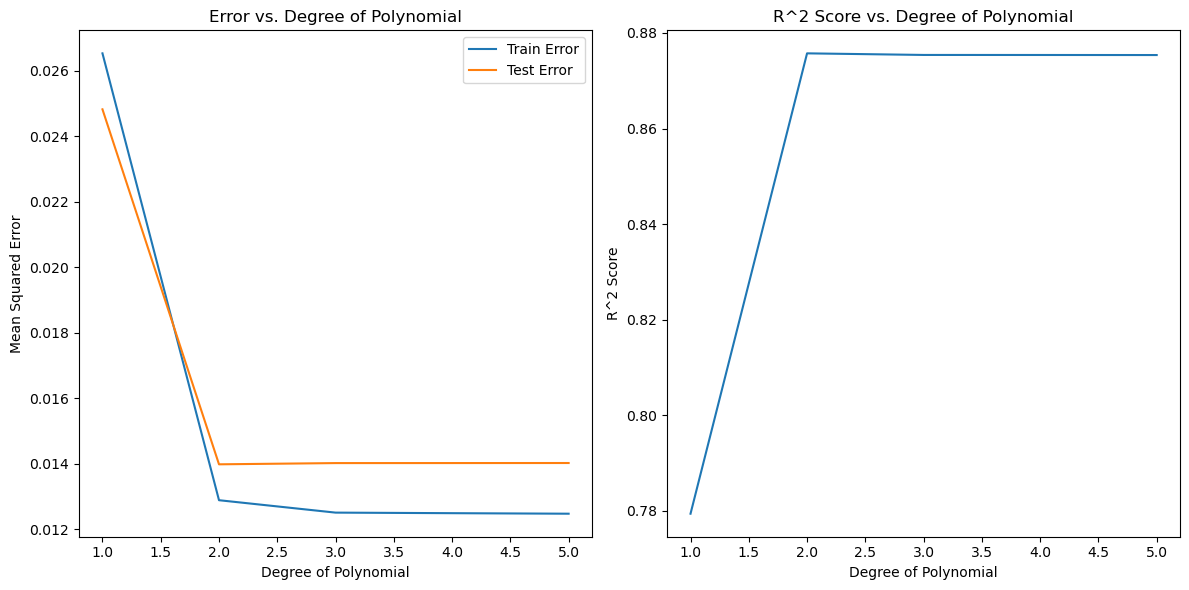

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que ya tienes tu DataFrame llamado 'dataframe'

# Divide los datos en conjuntos de entrenamiento y prueba
X = dataframe['Year'].values.reshape(-1, 1)
y = dataframe['Mean'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prueba varios grados de polinomio y evalúa el ajuste
degrees = [1, 2, 3, 4, 5]
train_errors = []
test_errors = []
r2_scores = []

for degree in degrees:
    # Transforma los datos con el grado del polinomio
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)
    
    # Ajusta un modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calcula el error cuadrático medio en ambos conjuntos
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Calcula el coeficiente de determinación (R^2)
    r2 = r2_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    r2_scores.append(r2)

# Visualización de los resultados
plt.figure(figsize=(12, 6))

# Gráfico de error cuadrático medio en conjuntos de entrenamiento y prueba
plt.subplot(1, 2, 1)
plt.plot(degrees, train_errors, label='Train Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Degree of Polynomial')
plt.legend()

# Gráfico de coeficiente de determinación (R^2)
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, label='R^2 Score')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Degree of Polynomial')

plt.tight_layout()
plt.show()

### Conclusion

- Grado 2 porque este modelo tiene un buen equilibrio entre sesgo (no es demasiado simple) y variabilidad (no es demasiado complejo).

- Un modelo de grado 2 podría estar capturando una tendencia general en los datos sin ajustarse en exceso a fluctuaciones o ruido. Esto puede llevar a una mejor capacidad de generalización a nuevos datos.

- Si observas que los errores se mantienen constantes o apenas cambian a medida que aumentas el grado del polinomio a partir del grado 2, esto puede ser una señal de que estás experimentando sobreajuste. El sobreajuste ocurre cuando un modelo es demasiado complejo y comienza a ajustarse demasiado a los detalles y el ruido en los datos de entrenamiento en lugar de capturar la verdadera tendencia subyacente.


## Corto plazo: Linial Regression

### Last 100: Decades

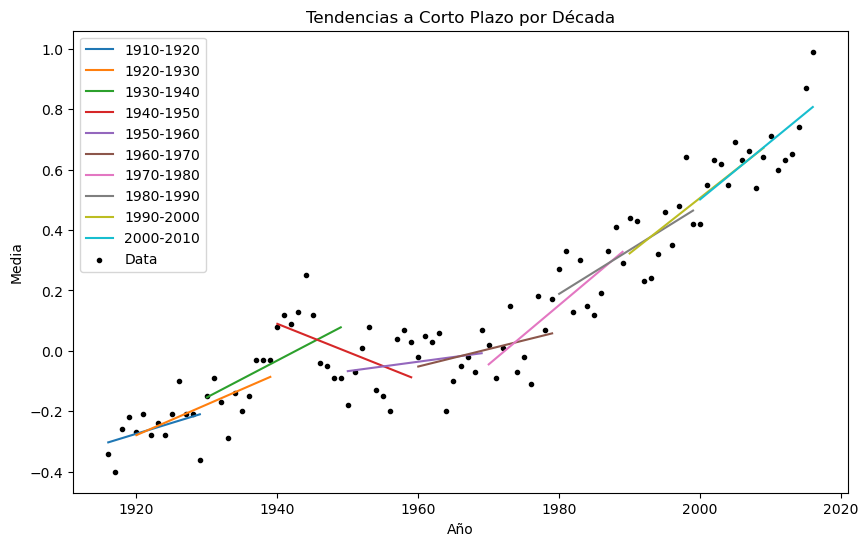

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos para los últimos 100 años
current_year = dataframe['Year'].max()
start_year = current_year - 100
filtered_df = dataframe[dataframe['Year'] >= start_year]

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar a través de las décadas y crear líneas de tendencia para cada tramo ascendente y descendente
unique_decades = filtered_df['Decade'].unique()
for i in range(len(unique_decades) - 1):
    current_decade = unique_decades[i]
    next_decade = unique_decades[i + 1]
    subset_df = filtered_df[(filtered_df['Decade'] >= current_decade) & (filtered_df['Decade'] <= next_decade)]

    # Calcular la línea de tendencia usando polyfit y crear la línea correspondiente
    coeffs = np.polyfit(subset_df['Year'], subset_df['Mean'], 1)
    trend_line = np.polyval(coeffs, subset_df['Year'])

    # Plotear la línea de tendencia
    ax.plot(subset_df['Year'], trend_line, label=f"{current_decade}-{next_decade}")

# Agregar los datos reales al gráfico
ax.scatter(filtered_df['Year'], filtered_df['Mean'], color='black', marker='.', label='Data')

# Configurar etiquetas y leyendas
ax.set_xlabel('Año')
ax.set_ylabel('Media')
ax.set_title('Tendencias a Corto Plazo por Década')
ax.legend()

# Mostrar el gráfico
plt.show()


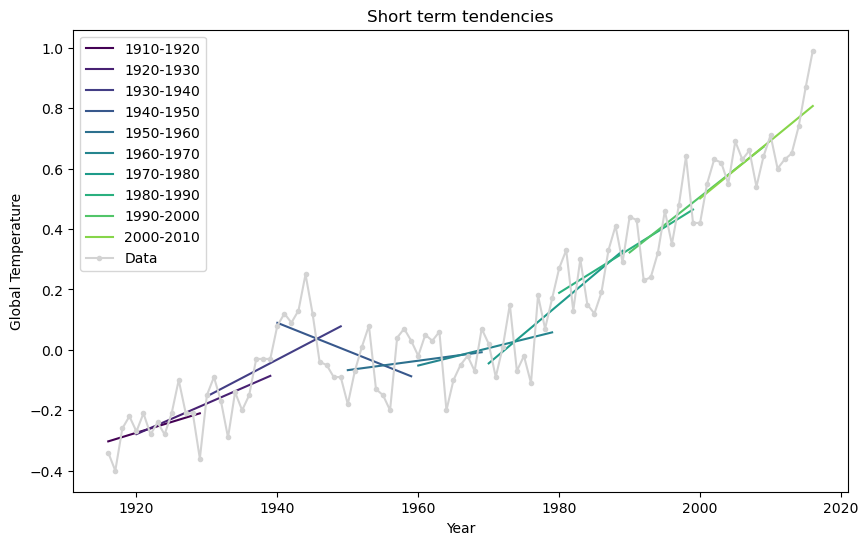

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos para los últimos 100 años
current_year = dataframe['Year'].max()
start_year = current_year - 100
filtered_df = dataframe[dataframe['Year'] >= start_year]

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar a través de las décadas y crear líneas de tendencia para cada tramo ascendente y descendente
unique_decades = filtered_df['Decade'].unique()
for i in range(len(unique_decades) - 1):
    current_decade = unique_decades[i]
    next_decade = unique_decades[i + 1]
    subset_df = filtered_df[(filtered_df['Decade'] >= current_decade) & (filtered_df['Decade'] <= next_decade)]

    # Calcular la línea de tendencia usando polyfit y crear la línea correspondiente
    coeffs = np.polyfit(subset_df['Year'], subset_df['Mean'], 1)
    trend_line = np.polyval(coeffs, subset_df['Year'])

    # Plotear la línea de tendencia con el color correspondiente
    color = plt.cm.viridis(i / len(unique_decades))  # Color diferente para cada década
    ax.plot(subset_df['Year'], trend_line, label=f"{current_decade}-{next_decade}", color=color)

# Plotear los datos reales con una línea que los conecte
ax.plot(filtered_df['Year'], filtered_df['Mean'], color='lightgray', marker='.', linestyle='-', label='Data')

# Configurar etiquetas y leyendas
ax.set_xlabel('Year')
ax.set_ylabel('Global Temperature')
ax.set_title('Short term tendencies')
ax.legend()

# Mostrar el gráfico
plt.show()


### Zoom tendencias 1940 - 1980

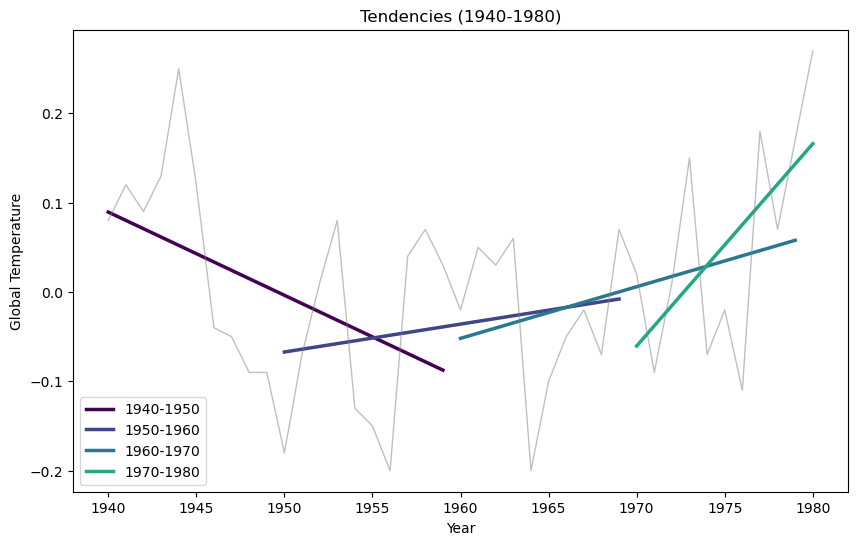

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos para el intervalo de años 1940-1980
filtered_df = dataframe[(dataframe['Year'] >= 1940) & (dataframe['Year'] <= 1980)]

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar a través de las décadas y crear líneas de tendencia para cada una
unique_decades = filtered_df['Decade'].unique()
for i in range(len(unique_decades) - 1):
    current_decade = unique_decades[i]
    next_decade = unique_decades[i + 1]
    subset_df = filtered_df[(filtered_df['Decade'] >= current_decade) & (filtered_df['Decade'] <= next_decade)]

    # Calcular la línea de tendencia usando polyfit y crear la línea correspondiente
    coeffs = np.polyfit(subset_df['Year'], subset_df['Mean'], 1)
    trend_line = np.polyval(coeffs, subset_df['Year'])

    # Plotear la línea de tendencia con el color correspondiente y más ancho
    color = plt.cm.viridis(i / len(unique_decades))  # Color diferente para cada década
    ax.plot(subset_df['Year'], trend_line, label=f"{current_decade}-{next_decade}", color=color, linewidth=2.5)

# Plotear los datos reales con una línea tenue que los conecte
ax.plot(filtered_df['Year'], filtered_df['Mean'], color='gray', linestyle='-', linewidth=1, alpha=0.5)

# Configurar etiquetas y leyendas
ax.set_xlabel('Year')
ax.set_ylabel('Global Temperature')
ax.set_title('Tendencies (1940-1980)')
ax.legend()

# Mostrar el gráfico
plt.show()


#### Conclusiones

- Un primer suceso fue un ligero enfriamiento que se registró de 1940 a 1970. Se pensaba que las causas de este enfriamiento eran la variabilidad natural más el efecto de algunos aerosoles, pero el estudio reveló que también contribuyeron la Primera Guerra Mundial, la Gran Depresión de los años 30 y la Segunda Guerra Mundial.

- Durante estos años hubo decrementos en el Producto Interno Bruto tanto de Europa como de Estados Unidos, que llevaron a disminuciones sin precedentes en las emisiones de CO2, que a su vez afectaron el forzamiento radiativo y contribuyeron a una disminución de las temperaturas global y hemisféricas.

- El siguiente momento registrado fue un boom de crecimiento económico al terminar la Segunda Guerra Mundial. En este periodo, la emisión de gases de efecto invernadero incrementó como nunca antes se había visto y de manera continua, eso hizo que alrededor de 1960, la tasa de crecimiento del forzamiento radiativo se incrementara de manera importante llevando a un aumento en las temperaturas. Según los autores del estudio, publicado en la revista Nature Geoscience, este momento marca el inicio del cambio climático sostenido del siglo XX.

In [222]:
dataframe

,Source,Year,Mean,Decade,Tasa_de_Cambio
0,GISTEMP,1880,-0.20,1880,NaN
2,GISTEMP,1881,-0.12,1880,0.008
4,GISTEMP,1882,-0.10,1880,0.002
6,GISTEMP,1883,-0.21,1880,-0.011
8,GISTEMP,1884,-0.28,1880,-0.007
...,...,...,...,...,...
264,GISTEMP,2012,0.63,2010,0.003
266,GISTEMP,2013,0.65,2010,0.002
268,GISTEMP,2014,0.74,2010,0.009
270,GISTEMP,2015,0.87,2010,0.013
